# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [7]:
# %pip install tensorflow --upgrade
# %pip install keras --upgrade
# %pip install scikit-learn
# %pip install matplotlib
# %pip install numpy
# %pip install np_utils
import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me
from keras.utils import to_categorical
%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [8]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [9]:
model = Sequential()
model.add(Dense(2, input_shape=(784,), activation='relu'))
model.add(Dense(6,input_shape=(784,), activation='relu'))
model.add(Dense(6,input_shape=(784,), activation='relu'))

#model.add(Dropout(0.1))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

c:\Users\Jarod\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700 (6.64 KB)

 Trainable params: 1,700 (6.64 KB)

 Non-trainable params: 0 (0.00 B)

Define some constants and train the MLP

In [10]:
batch_size = 128
n_epoch = 30

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2110 - loss: 2.0268 - val_accuracy: 0.4540 - val_loss: 1.4718
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4761 - loss: 1.4477 - val_accuracy: 0.5627 - val_loss: 1.2392
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5696 - loss: 1.2659 - val_accuracy: 0.6127 - val_loss: 1.1324
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6082 - loss: 1.1645 - val_accuracy: 0.6438 - val_loss: 1.0651
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6224 - loss: 1.1153 - val_accuracy: 0.6482 - val_loss: 1.0304
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6332 - loss: 1.0762 - val_accuracy: 0.6613 - val_loss: 0.9987
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6440 - loss: 1.0565 - val_accuracy: 0.6720 - val_loss: 0.9779
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6551 - loss: 1.0300 - val_accuracy: 0.

Show the performance of the model

Test score: 0.905213475227356
Test accuracy: 0.720300018787384


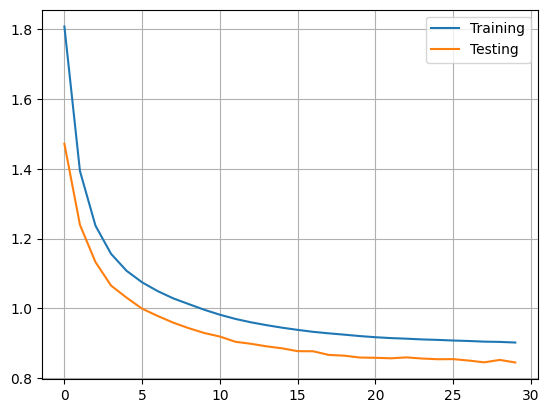

In [11]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


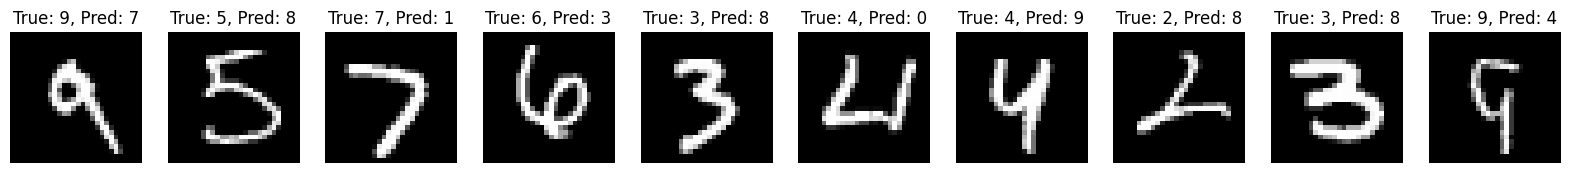

In [13]:
# Function to plot misclassified images
def plot_misclassified_images(X, y_true, y_pred, class_names, max_images=10):
    misclassified_indices = np.where(y_pred != y_true)[0]
    num_misclassified = len(misclassified_indices)
    
    if num_misclassified > 0:
        fig, axes = pl.subplots(1, min(max_images, num_misclassified), figsize=(20, 4))
        for ax, index in zip(axes.flat, misclassified_indices[:max_images]):
            ax.imshow(X[index].reshape(28, 28), cmap='gray', interpolation='none')
            ax.set_title(f"True: {class_names[y_true[index]]}, Pred: {class_names[y_pred[index]]}")
            ax.axis('off')
        pl.show()
    else:
        print("No misclassified images to show.")

# Predicting labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Plot misclassified images
plot_misclassified_images(X_test, y_true_classes, y_pred_classes, class_names=[str(i) for i in range(10)])

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 777,    0,   10,  108,    0,   62,    0,   20,    2,    1],
       [   0, 1091,    2,    1,    5,    2,   12,    0,   21,    1],
       [   4,   12,  623,  159,   11,   32,  100,    3,   88,    0],
       [  66,    3,  112,  566,    2,  140,    2,   21,   92,    6],
       [   0,   35,    2,    1,  843,    5,    4,    1,   25,   66],
       [  40,    7,   37,  177,   17,  403,    6,   51,  145,    9],
       [   4,   44,  119,   24,    2,   13,  679,    0,   72,    1],
       [  16,    8,    1,    7,   30,   52,    1,  785,   29,   99],
       [   6,  107,   29,   81,   25,  116,   23,   14,  568,    5],
       [   2,    2,    0,   10,  225,   23,    0,   37,    8,  702]],
      dtype=int64)